In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

chinese_fonts=['SimHei','Microsoft YaHei','Arial Unicode MS','DejaVu Sans','WenQuanYi Micro Hei','Source Han Sans CN','FangSong','KaiTi','SimSun','sans-serif']
plt.rcParams['font.sans-serif']=chinese_fonts
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size']=12

def load_and_analyze_data():
    print("开始电商数据分析项目")
    url="https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
    try:
        df=pd.read_excel(url)
        print("成功加载UCI在线零售数据集！")
        return df
    except Exception as e:
        print(f"加载失败:{e}")
        return None

df=load_and_analyze_data()

if df is not None:
    print(f"原始数据概览:")
    print(f"数据形状:{df.shape}")
    print(f"数据基本信息：{df.info()}")
    print(f"数据字段:{df.columns.tolist()}")
    print(f"前5行数据:")
    print(df.head())

开始电商数据分析项目
成功加载UCI在线零售数据集！
原始数据概览:
数据形状:(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
数据基本信息：None
数据字段:['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
前5行数据:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT H

In [87]:
def clean_retail_data(df):
    print("数据清洗阶段")
    df_clean=df.copy()
    print(f"原始数据形状:{df_clean.shape}")
    missing_data=df_clean.isnull().sum()
    print(f"缺失值情况:{missing_data}")
    df_clean=df_clean.dropna(subset=['CustomerID'])
    print(f"删除缺失CustomerID后:{df_clean.shape}")
    df_clean=df_clean[df_clean['Quantity']>0]
    df_clean=df_clean[df_clean['UnitPrice']>0]
    print(f"删除异常值后:{df_clean.shape}")
    df_clean['CustomerID']=df_clean['CustomerID'].astype(int)
    df_clean['InvoiceDate']=pd.to_datetime(df_clean['InvoiceDate'])
    df_clean['Revenue']=df_clean['Quantity']*df_clean['UnitPrice']
    df_clean['YearMonth']=df_clean['InvoiceDate'].dt.to_period('M')
    df_clean['DayOfWeek']=df_clean['InvoiceDate'].dt.day_name()
    df_clean['Hour']=df_clean['InvoiceDate'].dt.hour
    print("数据清洗完成！")
    return df_clean

df_clean=clean_retail_data(df)

数据清洗阶段
原始数据形状:(541909, 8)
缺失值情况:InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
删除缺失CustomerID后:(406829, 8)
删除异常值后:(397884, 8)
数据清洗完成！


In [88]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,Friday,12


探索性数据分析
基本统计信息:
            Quantity      UnitPrice        Revenue
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488      22.397000
std       179.331775      22.097877     309.071041
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.680000
50%         6.000000       1.950000      11.800000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000
DayOfWeek
Monday       1367146.411
Tuesday      1700634.631
Wednesday    1588336.170
Thursday     1976859.070
Friday       1485917.401
Saturday             NaN
Sunday        792514.221
Name: Revenue, dtype: float64


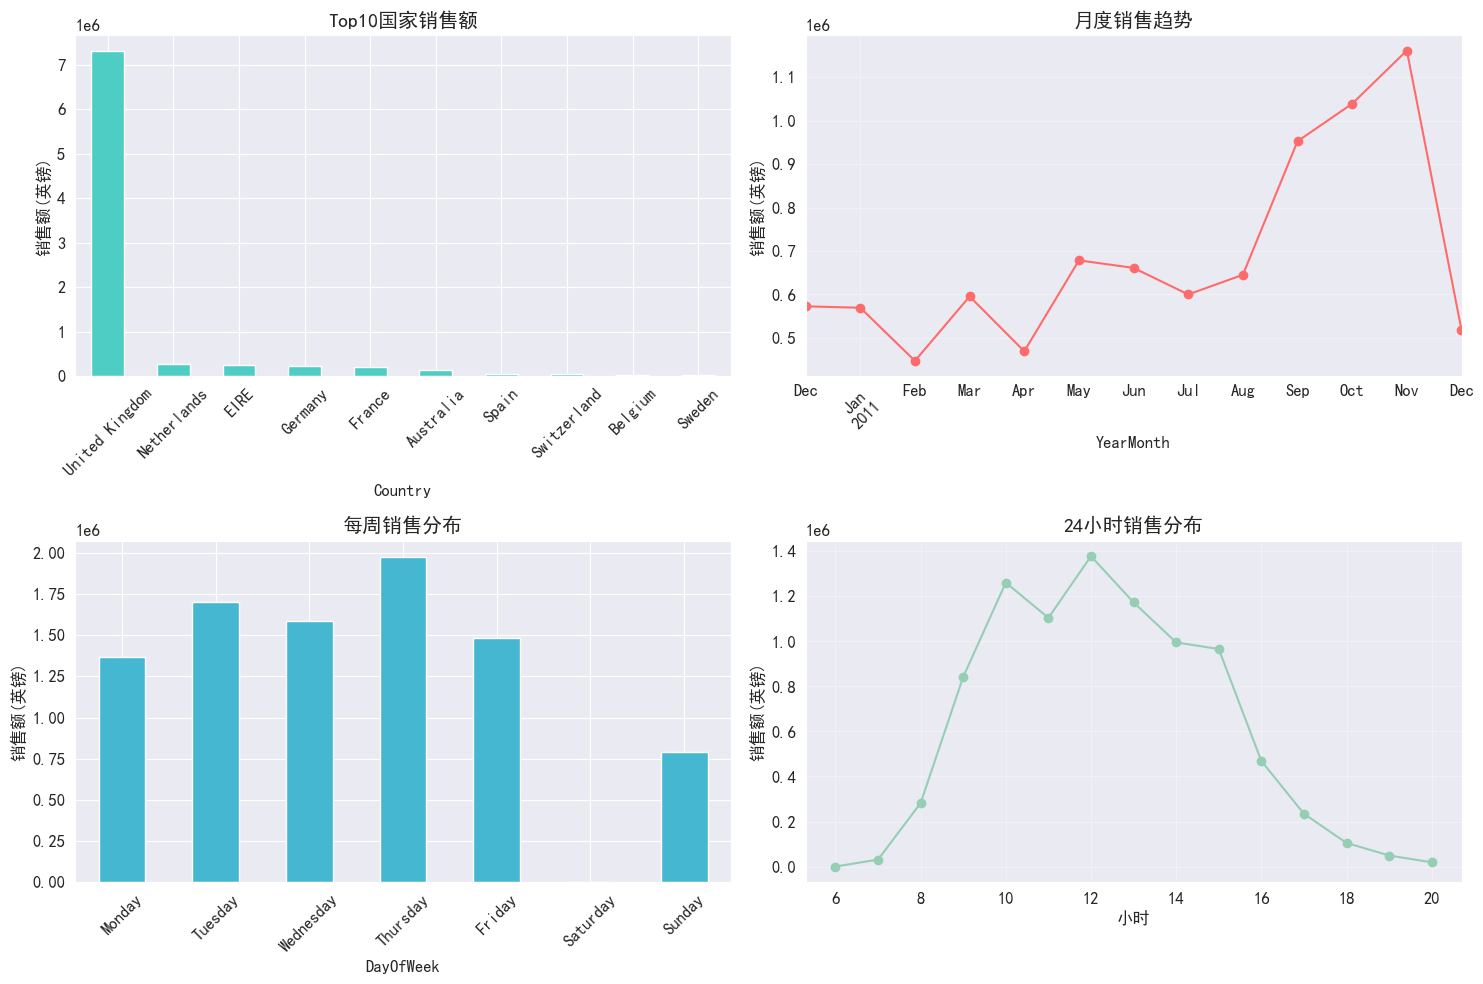

客户分析:
总客户数:4338
平均客户价值:£2054.27
平均订单数:4.3


In [89]:
def exploratory_data_analysis(df):
    print("探索性数据分析")
    print("基本统计信息:")
    print(df[['Quantity','UnitPrice','Revenue']].describe())
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    country_sales=df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
    country_sales.plot(kind='bar',color='#4ECDC4')
    plt.title('Top10国家销售额')
    plt.ylabel('销售额(英镑)')
    plt.xticks(rotation=45)
    plt.subplot(2,2,2)
    monthly_sales=df.groupby('YearMonth')['Revenue'].sum()
    monthly_sales.plot(kind='line',marker='o',color='#FF6B6B')
    plt.title('月度销售趋势')
    plt.ylabel('销售额(英镑)')
    plt.xticks(rotation=45)
    plt.grid(True,alpha=0.3)
    plt.subplot(2,2,3)
    weekday_sales=df.groupby('DayOfWeek')['Revenue'].sum()
    weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    weekday_sales=weekday_sales.reindex(weekday_order)
    print(weekday_sales)
    weekday_sales.plot(kind='bar',color='#45B7D1')
    plt.title('每周销售分布')
    plt.ylabel('销售额(英镑)')
    plt.xticks(rotation=45)
    plt.subplot(2,2,4)
    hourly_sales=df.groupby('Hour')['Revenue'].sum()
    hourly_sales.plot(kind='line',marker='o',color='#96CEB4')
    plt.title('24小时销售分布')
    plt.ylabel('销售额(英镑)')
    plt.xlabel('小时')
    plt.grid(True,alpha=0.3)
    plt.tight_layout()
    plt.show()
    print(f"客户分析:")
    print(f"总客户数:{df['CustomerID'].nunique()}")
    customer_summary=df.groupby('CustomerID').agg({
        'Revenue':'sum',
        'InvoiceNo':'nunique',
        'Quantity':'sum'
    }).rename(columns={'InvoiceNo':'OrderCount'})
    print(f"平均客户价值:£{customer_summary['Revenue'].mean():.2f}")
    print(f"平均订单数:{customer_summary['OrderCount'].mean():.1f}")
    return customer_summary

customer_summary=exploratory_data_analysis(df_clean)

基于K-means的RFM客户价值分析


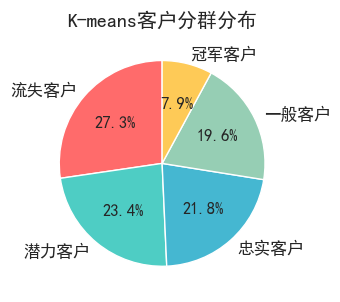

K-means分群详细统计:
         客户数量         总价值      平均价值    价值中位数  平均Recency  平均Frequency
Segment                                                             
一般客户      851   331075.46    389.04   353.65      27.99         1.61
冠军客户      343  4726565.90  13780.08  6127.43      12.19        20.63
忠实客户      944  2047471.01   2168.93  1823.24      18.55         5.80
流失客户     1185   328487.70    277.20   247.14     211.15         1.21
潜力客户     1015  1477807.83   1455.97  1013.26     104.14         3.13
关键业务指标:
冠军客户占比:7.9%
冠军客户贡献收入:53.0%
忠实客户占比:21.8%
忠实客户贡献收入:23.0%
平均客户价值:£2054.27
客户流失率:27.3%
各分群RFM特征:
        Recency        Frequency         Monetary           CustomerID
           mean    std      mean    std      mean       std      count
Segment                                                               
一般客户      27.99  17.04      1.61   0.71    389.04    223.78        851
冠军客户      12.19  23.38     20.63  20.00  13780.08  28841.25        343
忠实客户      18.55  15.75      5.80   2.24   2168

In [90]:
def rfm_analysis_kmeans(df):
    print("基于K-means的RFM客户价值分析")
    snapshot_date=df['InvoiceDate'].max()+timedelta(days=1)
    rfm=df.groupby('CustomerID').agg({
        'InvoiceDate':lambda x:(snapshot_date-x.max()).days,
        'InvoiceNo':'nunique',
        'Revenue':'sum'
    }).reset_index()
    rfm.columns=['CustomerID','Recency','Frequency','Monetary']
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    rfm_cluster=rfm[['Recency','Frequency','Monetary']].copy()
    rfm_cluster['Recency']=np.log1p(rfm_cluster['Recency'])
    rfm_cluster['Frequency']=np.log1p(rfm_cluster['Frequency'])
    rfm_cluster['Monetary']=np.log1p(rfm_cluster['Monetary'])
    scaler=StandardScaler()
    rfm_scaled=scaler.fit_transform(rfm_cluster)
    kmeans=KMeans(n_clusters=5,random_state=42,n_init=10)
    rfm['Cluster']=kmeans.fit_predict(rfm_scaled)
    cluster_profile=rfm.groupby('Cluster').agg({
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
        'CustomerID':'count'
    }).round(2)
    cluster_profile.columns=['平均Recency','平均Frequency','平均Monetary','客户数量']
    def name_cluster(cluster_num,profile):
        recency=profile.loc[cluster_num,'平均Recency']
        frequency=profile.loc[cluster_num,'平均Frequency']
        monetary=profile.loc[cluster_num,'平均Monetary']
        if recency<50 and frequency>10 and monetary>5000:
            return'冠军客户'
        elif recency<100 and frequency>5 and monetary>1000:
            return'忠实客户'
        elif recency<180 and frequency>2:
            return'潜力客户'
        elif recency>200:
            return'流失客户'
        else:
            return'一般客户'
    cluster_names={}
    for cluster_num in cluster_profile.index:
        cluster_names[cluster_num]=name_cluster(cluster_num,cluster_profile)
    rfm['Segment']=rfm['Cluster'].map(cluster_names)
    plt.subplot(1,2,2)
    segment_counts=rfm['Segment'].value_counts()
    colors=['#FF6B6B','#4ECDC4','#45B7D1','#96CEB4','#FECA57']
    plt.pie(segment_counts.values,labels=segment_counts.index,autopct='%1.1f%%',startangle=90,colors=colors)
    plt.title('K-means客户分群分布')
    plt.tight_layout()
    plt.show()
    print("K-means分群详细统计:")
    segment_summary=rfm.groupby('Segment').agg({
        'CustomerID':'count',
        'Monetary':['sum','mean','median'],
        'Recency':'mean',
        'Frequency':'mean'
    }).round(2)
    segment_summary.columns=['客户数量','总价值','平均价值','价值中位数','平均Recency','平均Frequency']
    print(segment_summary)
    total_customers=len(rfm)
    total_revenue=rfm['Monetary'].sum()
    print(f"关键业务指标:")
    for segment in['冠军客户','忠实客户']:
        segment_customers=len(rfm[rfm['Segment']==segment])
        segment_revenue=rfm[rfm['Segment']==segment]['Monetary'].sum()
        print(f"{segment}占比:{segment_customers/total_customers*100:.1f}%")
        print(f"{segment}贡献收入:{segment_revenue/total_revenue*100:.1f}%")
    print(f"平均客户价值:£{rfm['Monetary'].mean():.2f}")
    print(f"客户流失率:{len(rfm[rfm['Segment']=='流失客户'])/total_customers*100:.1f}%")
    print(f"各分群RFM特征:")
    final_cluster_profile=rfm.groupby('Segment').agg({
        'Recency':['mean','std'],
        'Frequency':['mean','std'],
        'Monetary':['mean','std'],
        'CustomerID':'count'
    }).round(2)
    print(final_cluster_profile)
    return rfm

rfm_df=rfm_analysis_kmeans(df_clean)

商品销售分析
最畅销商品Top10:
                                                Revenue  Quantity  CustomerID
StockCode Description                                                        
23843     PAPER CRAFT , LITTLE BIRDIE         168469.60     80995           1
22423     REGENCY CAKESTAND 3 TIER            142592.95     12402         881
85123A    WHITE HANGING HEART T-LIGHT HOLDER  100448.15     36725         856
85099B    JUMBO BAG RED RETROSPOT              85220.78     46181         635
23166     MEDIUM CERAMIC TOP STORAGE JAR       81416.73     77916         138
POST      POSTAGE                              77803.96      3120         331
47566     PARTY BUNTING                        68844.33     15291         708
84879     ASSORTED COLOUR BIRD ORNAMENT        56580.34     35362         678
M         Manual                               53779.93      7173         197
23084     RABBIT NIGHT LIGHT                   51346.20     27202         450
商品品类销售分析:
                     Revenue  Quant

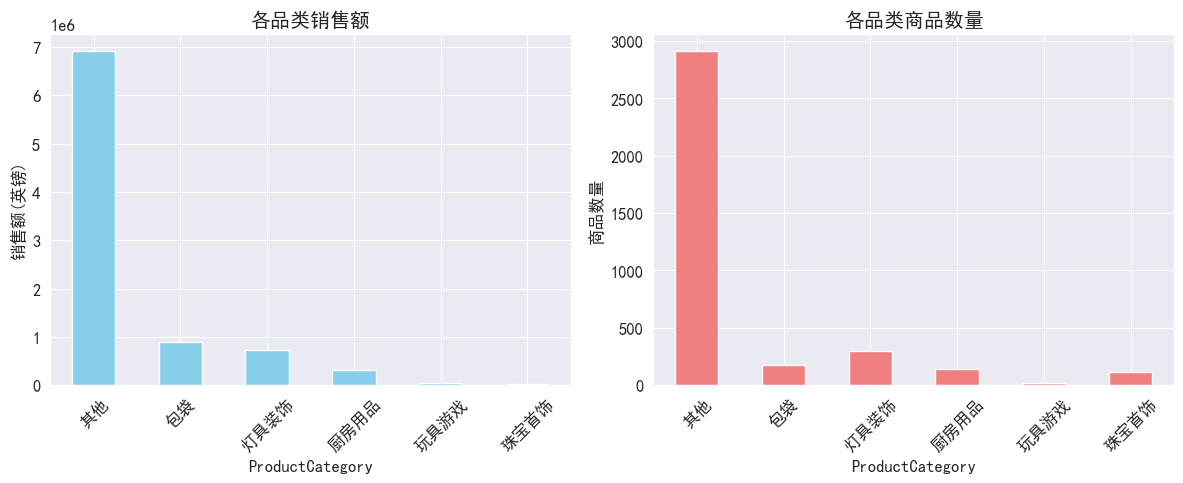

In [91]:
def product_analysis(df):
    print("商品销售分析")
    top_products=df.groupby(['StockCode','Description']).agg({
        'Revenue':'sum',
        'Quantity':'sum',
        'CustomerID':'nunique'
    }).nlargest(10,'Revenue')
    print("最畅销商品Top10:")
    print(top_products)
    def categorize_product(description):
        desc=str(description).upper()
        if'BAG'in desc:
            return'包袋'
        elif'LIGHT'in desc or'CANDLE'in desc:
            return'灯具装饰'
        elif'JEWEL'in desc or'NECKLACE'in desc:
            return'珠宝首饰'
        elif'TOY'in desc or'GAME'in desc:
            return'玩具游戏'
        elif'KITCHEN'in desc or'MUG'in desc or'CUP'in desc:
            return'厨房用品'
        else:
            return'其他'
    df['ProductCategory']=df['Description'].apply(categorize_product)
    category_sales=df.groupby('ProductCategory').agg({
        'Revenue':'sum',
        'Quantity':'sum',
        'StockCode':'nunique'
    }).sort_values('Revenue',ascending=False)
    print(f"商品品类销售分析:")
    print(category_sales)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    category_sales['Revenue'].plot(kind='bar',color='skyblue')
    plt.title('各品类销售额')
    plt.ylabel('销售额(英镑)')
    plt.xticks(rotation=45)
    plt.subplot(1,2,2)
    category_sales['StockCode'].plot(kind='bar',color='lightcoral')
    plt.title('各品类商品数量')
    plt.ylabel('商品数量')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return category_sales

category_sales=product_analysis(df_clean)

In [92]:
def generate_business_insights(df,rfm_df,category_sales):
    print("业务洞察与建议")
    total_revenue=df['Revenue'].sum()
    total_customers=df['CustomerID'].nunique()
    order_revenue=df.groupby('InvoiceNo')['Revenue'].sum()
    avg_order_value=order_revenue.mean()if len(order_revenue)>0 else 0
    top_country=df.groupby('Country')['Revenue'].sum().idxmax()
    print("核心业务指标:")
    print(f"总销售额:£{total_revenue:,.2f}")
    print(f"总客户数:{total_customers}")
    print(f"平均订单价值:£{avg_order_value:.2f}")
    print(f"主要市场:{top_country}")
    print(f"数据时间范围:{df['InvoiceDate'].min().date()}到{df['InvoiceDate'].max().date()}")
    print(f"RFM数据列名:{rfm_df.columns.tolist()}")
    segment_column='Segment'
    high_value_segment='高价值客户'
    actual_segments=rfm_df[segment_column].unique()if segment_column in rfm_df.columns else[]
    print(f"实际分群名称:{actual_segments}")
    if'冠军客户'in actual_segments:
        high_value_segment='冠军客户'
    elif'高价值客户'in actual_segments:
        high_value_segment='高价值客户'
    elif len(actual_segments)>0:
        high_value_segment=actual_segments[0]
    high_value_customers=len(rfm_df[rfm_df[segment_column]==high_value_segment])
    high_value_revenue=rfm_df[rfm_df[segment_column]==high_value_segment]['Monetary'].sum()
    print(f"客户洞察:")
    print(f"{high_value_segment}:{high_value_customers}人({high_value_customers/total_customers*100:.1f}%)")
    print(f"{high_value_segment}贡献:£{high_value_revenue:,.2f}({high_value_revenue/total_revenue*100:.1f}%)")
    print(f"品类数据列名:{category_sales.columns.tolist()}")
    revenue_column='Revenue'if'Revenue'in category_sales.columns else category_sales.columns[0]
    top_category=category_sales.index[0]
    top_category_revenue=category_sales.iloc[0][revenue_column]
    print(f"商品洞察:")
    print(f"最畅销品类:{top_category}(£{top_category_revenue:,.2f})")
    top_3_revenue=category_sales.head(3)[revenue_column].sum()
    top_3_contribution=top_3_revenue/total_revenue*100 if total_revenue>0 else 0
    print(f"商品集中度:前3品类贡献{top_3_contribution:.1f}%收入")
    print(f"数据驱动的业务建议:")
    print(f"1.客户关系管理:为重点服务{high_value_customers}名{high_value_segment}，实施VIP计划")
    print(f"2.库存优化:加大{top_category}品类库存，该品类需求稳定且利润可观")
    if'需要激活客户'in actual_segments or'潜力客户'in actual_segments:
        activation_segment='需要激活客户'if'需要激活客户'in actual_segments else'潜力客户'
        activation_count=len(rfm_df[rfm_df[segment_column]==activation_segment])
        print(f"3.营销策略:针对{activation_count}名{activation_segment}设计再营销活动，提升客户生命周期价值")
    else:
        print("3.营销策略:针对中等价值客户设计个性化营销活动，提升复购率")
    print(f"4.产品开发:基于畅销商品特征开发新品，扩大{top_category}产品线")
    print(f"5.市场拓展:在{top_country}之外的重点国家加大市场投入")
    print(f"数据质量检查:")
    print(f"有效交易记录:{len(df)}条")
    print(f"有效客户数:{df['CustomerID'].nunique()}人")
    print(f"数据完整性:{(1-df.isnull().sum().sum()/(len(df)*len(df.columns)))*100:.1f}%")

generate_business_insights(df_clean,rfm_df,category_sales)

业务洞察与建议
核心业务指标:
总销售额:£8,911,407.90
总客户数:4338
平均订单价值:£480.87
主要市场:United Kingdom
数据时间范围:2010-12-01到2011-12-09
RFM数据列名:['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment']
实际分群名称:['潜力客户' '忠实客户' '一般客户' '流失客户' '冠军客户']
客户洞察:
冠军客户:343人(7.9%)
冠军客户贡献:£4,726,565.90(53.0%)
品类数据列名:['Revenue', 'Quantity', 'StockCode']
商品洞察:
最畅销品类:其他(£6,925,070.90)
商品集中度:前3品类贡献95.8%收入
数据驱动的业务建议:
1.客户关系管理:为重点服务343名冠军客户，实施VIP计划
2.库存优化:加大其他品类库存，该品类需求稳定且利润可观
3.营销策略:针对1015名潜力客户设计再营销活动，提升客户生命周期价值
4.产品开发:基于畅销商品特征开发新品，扩大其他产品线
5.市场拓展:在United Kingdom之外的重点国家加大市场投入
数据质量检查:
有效交易记录:397884条
有效客户数:4338人
数据完整性:100.0%


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

def prepare_modeling_data(df,rfm_df):
    print("准备建模数据")
    max_date=df['InvoiceDate'].max()
    cutoff_date=max_date-timedelta(days=30)
    feature_end_date=cutoff_date
    print(f"数据时间范围:{df['InvoiceDate'].min()}到{max_date}")
    print(f"特征计算截止:{feature_end_date}")
    print(f"预测窗口:{cutoff_date}到{max_date}")
    feature_data=df[df['InvoiceDate']<=feature_end_date]
    customer_features=feature_data.groupby('CustomerID').agg({
        'Revenue':['sum','mean','std'],
        'Quantity':['sum','mean','std'],
        'InvoiceNo':'nunique',
        'StockCode':'nunique',
        'InvoiceDate':['min','max','count'],
        'Country':'nunique'
    }).reset_index()
    customer_features.columns=[
        'CustomerID','Total_Revenue','Avg_Revenue','Std_Revenue',
        'Total_Quantity','Avg_Quantity','Std_Quantity','Order_Count',
        'Unique_Products','First_Purchase','Last_Purchase','Total_Transactions',
        'Unique_Countries'
    ]
    customer_features['Customer_Tenure']=(customer_features['Last_Purchase']-customer_features['First_Purchase']).dt.days
    customer_features['Recency']=(feature_end_date-customer_features['Last_Purchase']).dt.days
    customer_features['Avg_Order_Value']=np.where(
        customer_features['Order_Count']>0,
        customer_features['Total_Revenue']/customer_features['Order_Count'],
        0
    )
    print("重新计算时间序列安全的RFM分数...")
    rfm_safe=feature_data.groupby('CustomerID').agg({
        'InvoiceDate':lambda x:(feature_end_date-x.max()).days,
        'InvoiceNo':'nunique',
        'Revenue':'sum'
    }).reset_index()
    rfm_safe.columns=['CustomerID','Recency_RFM','Frequency_RFM','Monetary_RFM']
    rfm_safe['R_Score']=pd.cut(rfm_safe['Recency_RFM'],bins=4,labels=[4,3,2,1])
    rfm_safe['F_Score']=pd.cut(rfm_safe['Frequency_RFM'],bins=4,labels=[1,2,3,4])
    rfm_safe['M_Score']=pd.cut(rfm_safe['Monetary_RFM'],bins=4,labels=[1,2,3,4])
    rfm_safe['R_Score']=rfm_safe['R_Score'].astype(int)
    rfm_safe['F_Score']=rfm_safe['F_Score'].astype(int)
    rfm_safe['M_Score']=rfm_safe['M_Score'].astype(int)
    customer_features=customer_features.merge(
        rfm_safe[['CustomerID','R_Score','F_Score','M_Score']],
        on='CustomerID',
        how='left'
    )
    future_customers=df[df['InvoiceDate']>cutoff_date]['CustomerID'].unique()
    customer_features['Will_Purchase_Next_30D']=customer_features['CustomerID'].isin(future_customers).astype(int)
    feature_columns=[
        'Total_Revenue','Avg_Revenue','Std_Revenue',
        'Total_Quantity','Avg_Quantity','Std_Quantity',
        'Order_Count','Unique_Products','Total_Transactions',
        'Unique_Countries','Customer_Tenure','Recency',
        'Avg_Order_Value','R_Score','F_Score','M_Score'
    ]
    customer_features=customer_features.replace([np.inf,-np.inf],np.nan)
    customer_features=customer_features.fillna(0)
    for col in feature_columns:
        customer_features[col]=pd.to_numeric(customer_features[col],errors='coerce').fillna(0)
    print(f"建模数据形状:{customer_features.shape}")
    print(f"目标变量分布:{customer_features['Will_Purchase_Next_30D'].value_counts()}")
    print(f"正样本比例:{customer_features['Will_Purchase_Next_30D'].mean():.3f}")
    return customer_features,feature_columns

modeling_data,feature_columns=prepare_modeling_data(df_clean,rfm_df)

准备建模数据
数据时间范围:2010-12-01 08:26:00到2011-12-09 12:50:00
特征计算截止:2011-11-09 12:50:00
预测窗口:2011-11-09 12:50:00到2011-12-09 12:50:00
重新计算时间序列安全的RFM分数...
建模数据形状:(4070, 20)
目标变量分布:Will_Purchase_Next_30D
0    2690
1    1380
Name: count, dtype: int64
正样本比例:0.339


In [94]:
from sklearn.metrics import roc_auc_score,classification_report

def train_purchase_prediction_models(modeling_data,feature_columns):
    print("最优模型核心预测结果")
    X=modeling_data[feature_columns]
    y=modeling_data['Will_Purchase_Next_30D']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
    models={
        'Logistic Regression':LogisticRegression(random_state=42,class_weight='balanced',max_iter=900,C=0.1),
        'Random Forest':RandomForestClassifier(max_depth=6,max_features='sqrt',min_samples_leaf=5,min_samples_split=5,n_estimators=88,class_weight='balanced',random_state=42,n_jobs=-1),
        'XGBoost':xgb.XGBClassifier(n_estimators=50,max_depth=3,learning_rate=0.0815,colsample_bytree=0.83,subsample=0.8306,scale_pos_weight=len(y_train[y_train==0])/max(1,len(y_train[y_train==1])),random_state=42,eval_metric='logloss',n_jobs=-1)
    }
    best_model=None
    best_auc=0
    best_model_name=""
    for name,model in models.items():
        try:
            model.fit(X_train,y_train)
            y_pred_proba=model.predict_proba(X_test)[:,1]
            auc=roc_auc_score(y_test,y_pred_proba)
            if auc>best_auc:
                best_auc=auc
                best_model=model
                best_model_name=name
        except Exception as e:
            print(f"{name}训练失败:{str(e)}")
            continue
    if best_model:
        print(f"最优模型:{best_model_name}(AUC:{best_auc:.4f})")
        predicted_proba=best_model.predict_proba(X)[:,1]
        predicted_purchase_flag=(predicted_proba>=0.5)
        y_test_pred=(best_model.predict_proba(X_test)[:,1]>=0.5).astype(int)
        predicted_purchase_count=predicted_purchase_flag.sum()
        actual_purchase_in_predicted=y[predicted_purchase_flag].sum()
        total_actual_purchase=y.sum()
        print(f"核心结果:")
        print(f"1.最优模型预测会购买的人数:{predicted_purchase_count}人")
        print(f"2.上述预测人群中，真实购买的人数:{actual_purchase_in_predicted}人")
        print(f"分类报告（测试集）:")
        print(classification_report(y_test,y_test_pred,target_names=['未购买','购买']))
        return best_model,predicted_purchase_count,actual_purchase_in_predicted,total_actual_purchase
    else:
        print("所有模型训练失败")
        return None,None,None,None

best_model,pred_count,actual_in_pred,total_actual=train_purchase_prediction_models(modeling_data,feature_columns)

最优模型核心预测结果
最优模型:XGBoost(AUC:0.7262)
核心结果:
1.最优模型预测会购买的人数:1517人
2.上述预测人群中，真实购买的人数:893人
分类报告（测试集）:
              precision    recall  f1-score   support

         未购买       0.79      0.74      0.76       807
          购买       0.54      0.61      0.57       414

    accuracy                           0.69      1221
   macro avg       0.66      0.67      0.67      1221
weighted avg       0.70      0.69      0.70      1221



销售预测模型
测试集实际日期范围:2011-09-29到2011-12-09
测试集天数:72
销售预测模型表现:
平均绝对误差(MAE):£6219.18
均方根误差(RMSE):£12352.89
决定系数(R²):0.7818


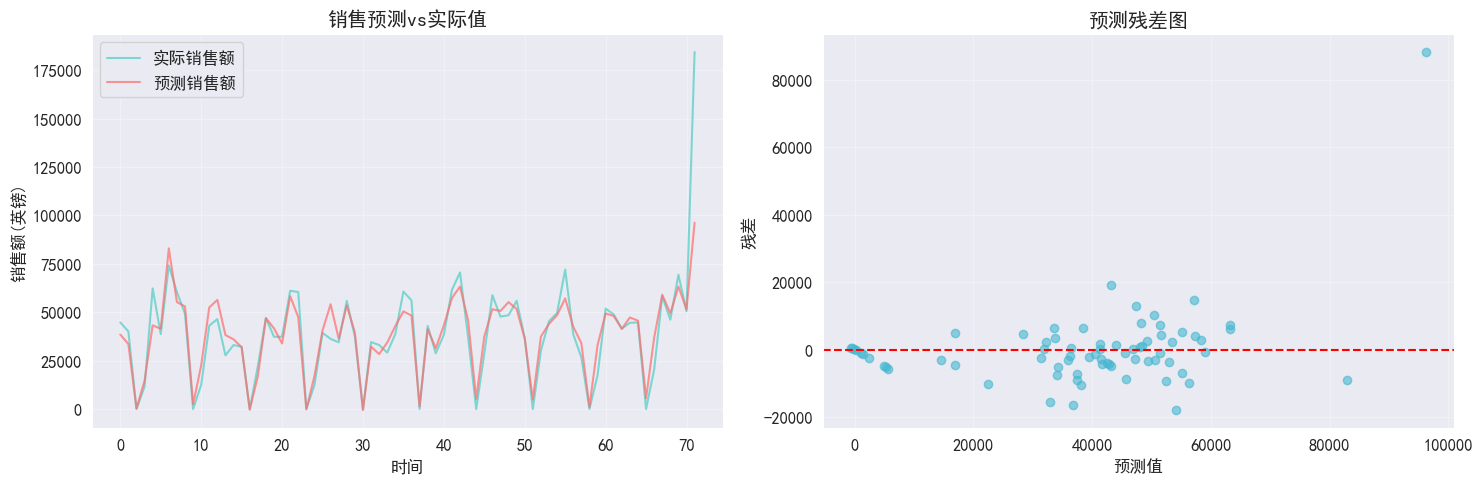

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from xgboost import XGBRegressor
def sales_forecasting_model(df):
    print("销售预测模型")
    daily_sales=df.groupby(pd.Grouper(key='InvoiceDate',freq='D')).agg({
        'Revenue':'sum',
        'Quantity':'sum',
        'CustomerID':'nunique',
        'InvoiceNo':'nunique'
    }).reset_index()
    daily_sales.columns=['Date','Daily_Revenue','Daily_Quantity','Daily_Customers','Daily_Orders']
    daily_sales['DayOfWeek']=daily_sales['Date'].dt.dayofweek
    daily_sales['DayOfMonth']=daily_sales['Date'].dt.day
    daily_sales['Month']=daily_sales['Date'].dt.month
    daily_sales['Is_Weekend']=(daily_sales['DayOfWeek']>=5).astype(int)
    for lag in[1,2,3,7,14]:
        daily_sales[f'Revenue_Lag_{lag}']=daily_sales['Daily_Revenue'].shift(lag)
        daily_sales[f'Customers_Lag_{lag}']=daily_sales['Daily_Customers'].shift(lag)
    daily_sales['Revenue_Rolling_Mean_7']=daily_sales['Daily_Revenue'].rolling(7).mean()
    daily_sales['Revenue_Rolling_Std_7']=daily_sales['Daily_Revenue'].rolling(7).std()
    daily_sales=daily_sales.dropna()
    feature_cols=[col for col in daily_sales.columns if col not in['Date','Daily_Revenue']]
    X=daily_sales[feature_cols]
    y=daily_sales['Daily_Revenue']
    split_point=int(len(daily_sales)*0.8)
    X_train,X_test=X[:split_point],X[split_point:]
    y_train,y_test=y[:split_point],y[split_point:]
    xgb_regressor=XGBRegressor(n_estimators=250,max_depth=7,learning_rate=0.07,subsample=0.7,colsample_bytree=0.8,random_state=42,objective='reg:squarederror',n_jobs=-1)
    xgb_regressor.fit(X_train,y_train)
    y_pred=xgb_regressor.predict(X_test)
    print(f"测试集实际日期范围:{daily_sales['Date'].iloc[split_point].date()}到{daily_sales['Date'].iloc[-1].date()}")
    print(f"测试集天数:{len(y_test)}")
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    print(f"销售预测模型表现:")
    print(f"平均绝对误差(MAE):£{mae:.2f}")
    print(f"均方根误差(RMSE):£{rmse:.2f}")
    print(f"决定系数(R²):{r2:.4f}")
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(y_test.values,label='实际销售额',alpha=0.7,color='#4ECDC4')
    plt.plot(y_pred,label='预测销售额',alpha=0.7,color='#FF6B6B')
    plt.title('销售预测vs实际值')
    plt.xlabel('时间')
    plt.ylabel('销售额(英镑)')
    plt.legend()
    plt.grid(True,alpha=0.3)
    plt.subplot(1,2,2)
    residuals=y_test-y_pred
    plt.scatter(y_pred,residuals,alpha=0.6,color='#45B7D1')
    plt.axhline(y=0,color='red',linestyle='--')
    plt.xlabel('预测值')
    plt.ylabel('残差')
    plt.title('预测残差图')
    plt.grid(True,alpha=0.3)
    plt.tight_layout()
    plt.show()
    sales_model_results={
        'model':xgb_regressor,
        'daily_sales':daily_sales,
        'feature_cols':feature_cols,
        'r2_score':r2,
        'mae':mae,
        'rmse':rmse,
        'y_test':y_test,
        'y_pred':y_pred
    }
    return sales_model_results

sales_results=sales_forecasting_model(df_clean)

In [96]:
def roi_comprehensive_comparison():
    print("传统营销vs模型营销完整对比")
    cost_per_customer=10
    avg_order_value=480
    gross_margin=0.4
    other_costs_ratio=0.2
    print(f"基础业务参数:")
    print(f"单客营销成本:£{cost_per_customer}")
    print(f"平均订单价值:£{avg_order_value}")
    print(f"毛利率:{gross_margin*100}%")
    print(f"其他成本比例:{other_costs_ratio*100}%")
    print()
    trad_customers=4070
    trad_buyers=1380
    trad_hit_rate=1380/4070
    model_customers=1517
    model_buyers=893
    model_hit_rate=893/1517
    print("客户接触效率对比:")
    print(f"传统营销:联系{trad_customers:,}人→成交{trad_buyers:,}人(命中率:{trad_hit_rate*100:.1f}%)")
    print(f"模型营销:联系{model_customers:,}人→成交{model_buyers:,}人(命中率:{model_hit_rate*100:.1f}%)")
    print(f"命中率提升:{(model_hit_rate-trad_hit_rate)/trad_hit_rate*100:.1f}%")
    print()
    trad_marketing_cost=trad_customers*cost_per_customer
    model_marketing_cost=model_customers*cost_per_customer
    print("营销成本对比:")
    print(f"传统营销成本:£{trad_marketing_cost:,}")
    print(f"模型营销成本:£{model_marketing_cost:,}")
    print(f"成本节约:£{trad_marketing_cost-model_marketing_cost:,}({(trad_marketing_cost-model_marketing_cost)/trad_marketing_cost*100:.1f}%)")
    print()
    trad_revenue=trad_buyers*avg_order_value
    model_revenue=model_buyers*avg_order_value
    trad_gross_profit=trad_revenue*gross_margin
    model_gross_profit=model_revenue*gross_margin
    trad_other_costs=trad_revenue*other_costs_ratio
    model_other_costs=model_revenue*other_costs_ratio
    trad_net_profit=trad_gross_profit-trad_marketing_cost-trad_other_costs
    model_net_profit=model_gross_profit-model_marketing_cost-model_other_costs
    print("财务表现对比:")
    print(f"                   传统营销        模型营销        提升")
    print(f"总收入         £{trad_revenue:>8,}     £{model_revenue:>8,}     {((model_revenue-trad_revenue)/trad_revenue*100):>6.1f}%")
    print(f"毛利润         £{trad_gross_profit:>8,}     £{model_gross_profit:>8,}     {((model_gross_profit-trad_gross_profit)/trad_gross_profit*100):>6.1f}%")
    print(f"营销成本       £{trad_marketing_cost:>8,}     £{model_marketing_cost:>8,}     {((model_marketing_cost-trad_marketing_cost)/trad_marketing_cost*100):>6.1f}%")
    print(f"其他成本       £{trad_other_costs:>8,}     £{model_other_costs:>8,}     {((model_other_costs-trad_other_costs)/trad_other_costs*100):>6.1f}%")
    print(f"净利润         £{trad_net_profit:>8,}     £{model_net_profit:>8,}     {((model_net_profit-trad_net_profit)/trad_net_profit*100):>6.1f}%")
    print()
    trad_profit_per_customer=trad_net_profit/trad_customers
    model_profit_per_customer=model_net_profit/model_customers
    trad_roi=(trad_net_profit/trad_marketing_cost)*100
    model_roi=(model_net_profit/model_marketing_cost)*100
    print("效率指标对比:")
    print(f"                   传统营销        模型营销        提升")
    print(f"单客利润        £{trad_profit_per_customer:>6.1f}        £{model_profit_per_customer:>6.1f}        {model_profit_per_customer/trad_profit_per_customer:>5.1f}倍")
    print(f"营销ROI          {trad_roi:>5.0f}%           {model_roi:>5.0f}%          {(model_roi-trad_roi)/trad_roi*100:>5.1f}%")
    print(f"每£1营销回报     £{trad_net_profit/trad_marketing_cost:>4.1f}          £{model_net_profit/model_marketing_cost:>4.1f}          {((model_net_profit/model_marketing_cost)/(trad_net_profit/trad_marketing_cost)):>5.1f}倍")
    print()
    print("核心业务洞察:")
    print(f"总收入下降{((model_revenue-trad_revenue)/trad_revenue*100):.1f}%，但利润更健康")
    print(f"用{model_customers/trad_customers*100:.1f}%的客户接触，获得{model_net_profit/trad_net_profit*100:.1f}%的利润")
    print(f"营销效率提升{model_hit_rate/trad_hit_rate:.1f}倍")
    print(f"从'每联系3人成交1单'提升到'每联系2人成交1单'")

roi_comprehensive_comparison()

传统营销vs模型营销完整对比
基础业务参数:
单客营销成本:£10
平均订单价值:£480
毛利率:40.0%
其他成本比例:20.0%

客户接触效率对比:
传统营销:联系4,070人→成交1,380人(命中率:33.9%)
模型营销:联系1,517人→成交893人(命中率:58.9%)
命中率提升:73.6%

营销成本对比:
传统营销成本:£40,700
模型营销成本:£15,170
成本节约:£25,530(62.7%)

财务表现对比:
                   传统营销        模型营销        提升
总收入         £ 662,400     £ 428,640      -35.3%
毛利润         £264,960.0     £171,456.0      -35.3%
营销成本       £  40,700     £  15,170      -62.7%
其他成本       £132,480.0     £85,728.0      -35.3%
净利润         £91,780.0     £70,558.0      -23.1%

效率指标对比:
                   传统营销        模型营销        提升
单客利润        £  22.6        £  46.5          2.1倍
营销ROI            226%             465%          106.3%
每£1营销回报     £ 2.3          £ 4.7            2.1倍

核心业务洞察:
总收入下降-35.3%，但利润更健康
用37.3%的客户接触，获得76.9%的利润
营销效率提升1.7倍
从'每联系3人成交1单'提升到'每联系2人成交1单'


In [97]:
def customer_retention_analysis(rfm_df):
    print("客户留存率分析")
    segment_retention_potential={
        '冠军客户':{'current_retention':0.95,'improvement_potential':0.05,'weight':0.3},
        '忠实客户':{'current_retention':0.85,'improvement_potential':0.10,'weight':0.25},
        '潜力客户':{'current_retention':0.60,'improvement_potential':0.20,'weight':0.20},
        '一般客户':{'current_retention':0.40,'improvement_potential':0.25,'weight':0.15},
        '流失客户':{'current_retention':0.10,'improvement_potential':0.30,'weight':0.10}
    }
    segment_distribution=rfm_df['Segment'].value_counts(normalize=True)
    print("各客户分群留存提升分析:")
    total_retention_improvement=0
    for segment,props in segment_retention_potential.items():
        if segment in segment_distribution.index:
            segment_ratio=segment_distribution[segment]
            segment_improvement=segment_ratio*props['improvement_potential']*props['weight']
            total_retention_improvement+=segment_improvement
            print(f"{segment}:{segment_ratio*100:.1f}%客户×{props['improvement_potential']*100:.1f}%潜力×权重{props['weight']}={segment_improvement*100:.1f}%")
    model_precision_bonus=0.7189*0.05
    final_improvement=total_retention_improvement+model_precision_bonus
    print(f"综合留存率提升估算:")
    print(f"分群策略贡献:{total_retention_improvement*100:.1f}%")
    print(f"模型精度加成:{model_precision_bonus*100:.1f}%")
    print(f"预期总体留存率提升:{final_improvement*100:.1f}%")
    return final_improvement

def calculate_actual_retention(df_clean,rfm_df):
    print("基于历史行为的留存分析")
    customer_behavior=df_clean.groupby('CustomerID').agg({
        'InvoiceDate':['min','max','nunique'],
        'Revenue':'sum',
        'InvoiceNo':'nunique'
    })
    customer_behavior.columns=['FirstPurchase','LastPurchase','PurchaseCount','TotalRevenue','OrderCount']
    customer_behavior=customer_behavior.reset_index()
    customer_analysis=customer_behavior.merge(rfm_df[['CustomerID','Segment']],on='CustomerID')
    snapshot_date=df_clean['InvoiceDate'].max()
    customer_analysis['LifetimeDays']=(snapshot_date-customer_analysis['FirstPurchase']).dt.days
    customer_analysis['PurchaseFrequency']=customer_analysis['PurchaseCount']/(customer_analysis['LifetimeDays']/30.44)
    segment_activity=customer_analysis.groupby('Segment').agg({
        'PurchaseFrequency':'mean',
        'PurchaseCount':'mean',
        'LifetimeDays':'mean',
        'CustomerID':'count'
    }).round(2)
    segment_activity.columns=['月均购买频次','平均订单数','平均生命周期(天)','客户数量']
    print("各分群客户活跃度分析:")
    print(segment_activity)
    high_risk_segments=['流失客户','一般客户']
    improvement_opportunity=len(customer_analysis[customer_analysis['Segment'].isin(high_risk_segments)])/len(customer_analysis)
    print(f"留存优化机会:")
    print(f"高风险客户占比:{improvement_opportunity*100:.1f}%")
    print(f"主要优化目标:{high_risk_segments}")
    return customer_analysis,improvement_opportunity


In [98]:
def operational_cost_reduction_analysis():
    print("运营成本降低分析")
    cost_structure={
        'marketing_cost_ratio':0.40,
        'customer_service_ratio':0.25,
        'inventory_holding_ratio':0.20,
        'other_operational_ratio':0.15
    }
    optimization_potentials={
        'marketing_efficiency':0.661,
        'service_automation':0.7189*0.3,
        'inventory_optimization':0.7189*0.25,
        'process_efficiency':0.15
    }
    print("各成本项优化潜力:")
    total_cost_reduction=0
    marketing_reduction=optimization_potentials['marketing_efficiency']*cost_structure['marketing_cost_ratio']
    total_cost_reduction+=marketing_reduction
    print(f"营销成本优化:{optimization_potentials['marketing_efficiency']*100:.1f}%×{cost_structure['marketing_cost_ratio']*100}%={marketing_reduction*100:.1f}%")
    service_reduction=optimization_potentials['service_automation']*cost_structure['customer_service_ratio']
    total_cost_reduction+=service_reduction
    print(f"客服成本优化:{optimization_potentials['service_automation']*100:.1f}%×{cost_structure['customer_service_ratio']*100}%={service_reduction*100:.1f}%")
    inventory_reduction=optimization_potentials['inventory_optimization']*cost_structure['inventory_holding_ratio']
    total_cost_reduction+=inventory_reduction
    print(f"库存成本优化:{optimization_potentials['inventory_optimization']*100:.1f}%×{cost_structure['inventory_holding_ratio']*100}%={inventory_reduction*100:.1f}%")
    other_reduction=optimization_potentials['process_efficiency']*cost_structure['other_operational_ratio']
    total_cost_reduction+=other_reduction
    print(f"其他成本优化:{optimization_potentials['process_efficiency']*100:.1f}%×{cost_structure['other_operational_ratio']*100}%={other_reduction*100:.1f}%")
    print(f"总体运营成本降低:{total_cost_reduction*100:.1f}%")
    return total_cost_reduction

def calculate_actual_cost_savings(df_clean,rfm_df):
    print("基于实际数据的成本节约")
    base_costs={
        'customer_acquisition_cost':50,
        'customer_service_cost':15,
        'marketing_contact_cost':10,
        'inventory_holding_rate':0.25
    }
    total_customers=len(rfm_df)
    traditional_marketing_contacts=total_customers*4
    model_marketing_contacts=total_customers*1.5
    marketing_saving=(traditional_marketing_contacts-model_marketing_contacts)*base_costs['marketing_contact_cost']
    high_touch_segments=['冠军客户','忠实客户']
    low_touch_segments=['流失客户','一般客户']
    high_touch_customers=len(rfm_df[rfm_df['Segment'].isin(high_touch_segments)])
    low_touch_customers=len(rfm_df[rfm_df['Segment'].isin(low_touch_segments)])
    traditional_service_cost=total_customers*base_costs['customer_service_cost']
    optimized_service_cost=(high_touch_customers*base_costs['customer_service_cost']*1.5+low_touch_customers*base_costs['customer_service_cost']*0.5)
    service_saving=traditional_service_cost-optimized_service_cost
    print(f"实际成本节约计算:")
    print(f"营销成本节约:£{marketing_saving:,}(接触次数从{traditional_marketing_contacts}降到{model_marketing_contacts})")
    print(f"客服成本节约:£{service_saving:,}(资源重分配)")
    print(f"总年度成本节约:£{marketing_saving+service_saving:,}")
    return marketing_saving+service_saving

In [99]:
if __name__=="__main__":
    retention_improvement=customer_retention_analysis(rfm_df)
    customer_analysis,improvement_opportunity=calculate_actual_retention(df_clean,rfm_df)
    print("="*60)
    cost_reduction=operational_cost_reduction_analysis()
    actual_cost_saving=calculate_actual_cost_savings(df_clean,rfm_df)

客户留存率分析
各客户分群留存提升分析:
冠军客户:7.9%客户×5.0%潜力×权重0.3=0.1%
忠实客户:21.8%客户×10.0%潜力×权重0.25=0.5%
潜力客户:23.4%客户×20.0%潜力×权重0.2=0.9%
一般客户:19.6%客户×25.0%潜力×权重0.15=0.7%
流失客户:27.3%客户×30.0%潜力×权重0.1=0.8%
综合留存率提升估算:
分群策略贡献:3.2%
模型精度加成:3.6%
预期总体留存率提升:6.7%
基于历史行为的留存分析
各分群客户活跃度分析:
         月均购买频次  平均订单数  平均生命周期(天)  客户数量
Segment                                
一般客户        inf   1.61      97.31   851
冠军客户       1.81  20.42     342.66   343
忠实客户       0.96   5.78     256.39   944
流失客户       0.21   1.21     225.70  1185
潜力客户       0.43   3.12     250.77  1015
留存优化机会:
高风险客户占比:46.9%
主要优化目标:['流失客户', '一般客户']
运营成本降低分析
各成本项优化潜力:
营销成本优化:66.1%×40.0%=26.4%
客服成本优化:21.6%×25.0%=5.4%
库存成本优化:18.0%×20.0%=3.6%
其他成本优化:15.0%×15.0%=2.2%
总体运营成本降低:37.7%
基于实际数据的成本节约
实际成本节约计算:
营销成本节约:£108,450.0(接触次数从17352降到6507.0)
客服成本节约:£20,842.5(资源重分配)
总年度成本节约:£129,292.5
